In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os


import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,)) 
])

In [4]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

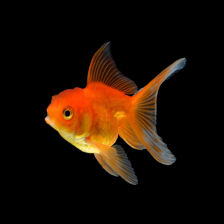

In [5]:
gold_fish=Image.open('/content/sample_data/goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish)
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish = gold_fish / 255.0
gold_fish

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [8]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [9]:
result = classifier.predict(gold_fish[np.newaxis,...])
result.shape

1/1 [==============================] - 8s 8s/step


(1, 1001)

In [10]:
result

array([[ 0.3401349 ,  1.9139689 , 10.5653715 , ..., -2.7722988 ,
        -0.65011436, -0.21602392]], dtype=float32)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [12]:
image_labels = []
with open("/content/sample_data/ImageNetLabels.txt",'r') as f:
    image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [13]:
image_labels[predicted_label_index]

'goldfish'

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,cache_dir='.',untar=True)

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/4290566894_c7f061583d_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/17719248689_cfd5d2f228_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13561912705_e5eeb41433_z.jpg'),
 PosixPath('datasets/flower_photos/tulips/12025042086_78bafc0eb6_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8687675254_c93f50d8b0_m.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3171577977_8608282f04_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3494252600_29f26e3ff0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8692040971_826614516f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg')]

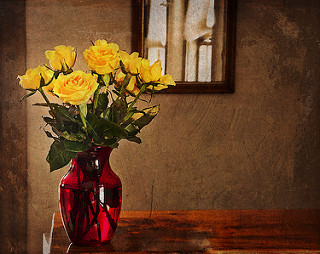

In [19]:
Image.open(str(roses[1]))

In [20]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/4290566894_c7f061583d_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/17719248689_cfd5d2f228_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13561912705_e5eeb41433_z.jpg'),
 PosixPath('datasets/flower_photos/tulips/12025042086_78bafc0eb6_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8687675254_c93f50d8b0_m.jpg')]

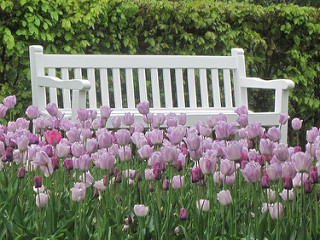

In [21]:
Image.open(str(tulips[3]))

In [22]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflower':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [23]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3171577977_8608282f04_m.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3494252600_29f26e3ff0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8692040971_826614516f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg')]

In [24]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflower':3,
    'tulips':4
}

In [25]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 239, 3)

In [26]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [27]:
X , y = [] , []

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

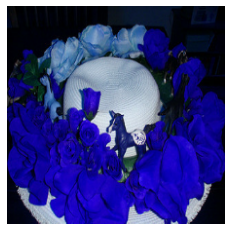

In [31]:
plt.axis('off')
plt.imshow(X[2])

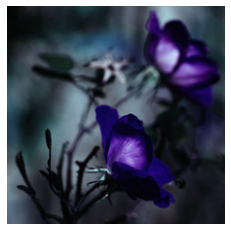

In [32]:
plt.axis('off')
plt.imshow(X[0])

In [33]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 1s 731ms/step


array([722, 795, 795])

In [34]:
image_labels[predicted[2]]

'shower curtain'

In [35]:
feature_vector_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_vector_model,input_shape = (224,224,3),trainable=False
)

In [36]:
num_of_flowers = 5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [37]:
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']

)

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 7s 42ms/step - loss: 0.8341 - accuracy: 0.6875
Epoch 2/5
86/86 [==============================] - 4s 42ms/step - loss: 0.4108 - accuracy: 0.8594
Epoch 3/5
86/86 [==============================] - 4s 42ms/step - loss: 0.3160 - accuracy: 0.8957
Epoch 4/5
86/86 [==============================] - 4s 42ms/step - loss: 0.2648 - accuracy: 0.9186
Epoch 5/5
86/86 [==============================] - 4s 42ms/step - loss: 0.2283 - accuracy: 0.9335


In [38]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 55ms/step - loss: 0.4032 - accuracy: 0.8715


[0.4032079875469208, 0.8714597225189209]